In [ ]:
from epynet import Network
import numpy as np
import pandas as pd
import operator

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src/')
from network_grouping import *

In [21]:
inp = "../input/santaizabel0118.inp"
n_groups = 20

net = Network(inp)
keys = net.nodes.keys()
all_nodes = [net.nodes[key] for key in keys] # List of all possible nodes
net.ep.ENclose()
    
nodes_uid = [n.uid for n in all_nodes if n.node_type == "Junction"] # Remove elements that are not Junction in all_nodes

#print nodes_uid

In [44]:
# Get y from csv

df = pd.read_csv('st_izabel-0118_20groups.csv')
nodes_groups = np.asarray(df)

nodes = [str(nodes_groups[i,0]) for i in range(nodes_groups.shape[0])]
groups = nodes_groups[:,1]
y = zip(nodes, nodes_groups[:,1])
y = dict(y)

for i in sorted(y, key=y.get, reverse=False):
    print "\""+ str(i) + "\"" + " : " + str(y[i]+1) + ","

"31" : 1,
"35" : 1,
"24" : 1,
"26" : 1,
"20" : 1,
"22" : 1,
"23" : 1,
"7" : 1,
"1132" : 1,
"1131" : 1,
"1130" : 1,
"185" : 1,
"17" : 1,
"16" : 1,
"19" : 1,
"18" : 1,
"9" : 1,
"44" : 1,
"349" : 2,
"529" : 2,
"559" : 2,
"558" : 2,
"554" : 2,
"557" : 2,
"556" : 2,
"551" : 2,
"550" : 2,
"553" : 2,
"552" : 2,
"1" : 2,
"135" : 2,
"371" : 2,
"586" : 2,
"587" : 2,
"584" : 2,
"585" : 2,
"582" : 2,
"583" : 2,
"588" : 2,
"1000" : 2,
"1126" : 2,
"883" : 2,
"887" : 2,
"886" : 2,
"885" : 2,
"884" : 2,
"888" : 2,
"359" : 2,
"542" : 2,
"543" : 2,
"540" : 2,
"541" : 2,
"546" : 2,
"547" : 2,
"545" : 2,
"548" : 2,
"549" : 2,
"570" : 2,
"576" : 2,
"575" : 2,
"350" : 2,
"537" : 2,
"536" : 2,
"535" : 2,
"533" : 2,
"532" : 2,
"531" : 2,
"530" : 2,
"539" : 2,
"538" : 2,
"113" : 2,
"372" : 2,
"568" : 2,
"569" : 2,
"560" : 2,
"561" : 2,
"562" : 2,
"563" : 2,
"564" : 2,
"565" : 2,
"566" : 2,
"567" : 2,
"605" : 2,
"604" : 2,
"607" : 2,
"606" : 2,
"1085" : 3,
"1084" : 3,
"544" : 3,
"1100" : 3,
"1096" : 3,
"1094" :

In [5]:
#graph_groups(inp, y, n_groups)

In [59]:
def porcent_group(inp, y, i, emitter):

    p_group = []
    node_covered = []
    node_discovered = []
    
    sensor = nodes_next_center(inp, y, i) # Take a sensor of group    
    node_list = [key for key in y.keys() if y[key] == i] # Take the nodes in this group
    
    for j in range(len(node_list)): # node by node 
    
        # Pressure at node leak
        y_simulated_node = simulation(inp, sensorIds=[str(node_list[j])], nodeIds=[str(node_list[j])])
        y_simulated_leak_node = simulation(inp, emitter= emitter, sensorIds=[str(node_list[j])], nodeIds=[str(node_list[j])])
    
        # Pressure at sensors
        y_simulated_sensor = simulation(inp, sensorIds=sensor, nodeIds=[str(node_list[j])])
        y_simulated_leak_sensor = simulation(inp, emitter= emitter, sensorIds=sensor, nodeIds=[str(node_list[j])])

        y_dif_node = np.mean(y_simulated_node - y_simulated_leak_node)    # Mean at time
        y_dif_sensor = np.mean((y_simulated_sensor - y_simulated_leak_sensor)) # Mean at time

        p_node = (y_dif_sensor/y_dif_node)*100
        
        p_group.append(p_node)
        
    node_value = [[node_list[indice], p_group[indice]] for indice in range(len(p_group))]
    node_value = dict(node_value)
    node_value = sorted(node_value.items(), key=operator.itemgetter(1))  # Coloca os valores em ordem crescente
    
    return node_value

Group 0
[('9', 67.958663817846883), ('44', 75.868642424792938), ('31', 81.016839208470998), ('185', 86.489929782264511), ('7', 87.751743163242196), ('1132', 87.991186519411684), ('1130', 95.044600011619579), ('1131', 95.409267622947738), ('19', 96.071095947543526), ('18', 96.147948073720073), ('20', 96.546362698447481), ('22', 96.852611636912073), ('17', 96.856428632688747), ('35', 97.058715839747251), ('23', 97.381535638630467), ('26', 98.599915149427957), ('24', 98.655998109896814), ('16', 100.0)]


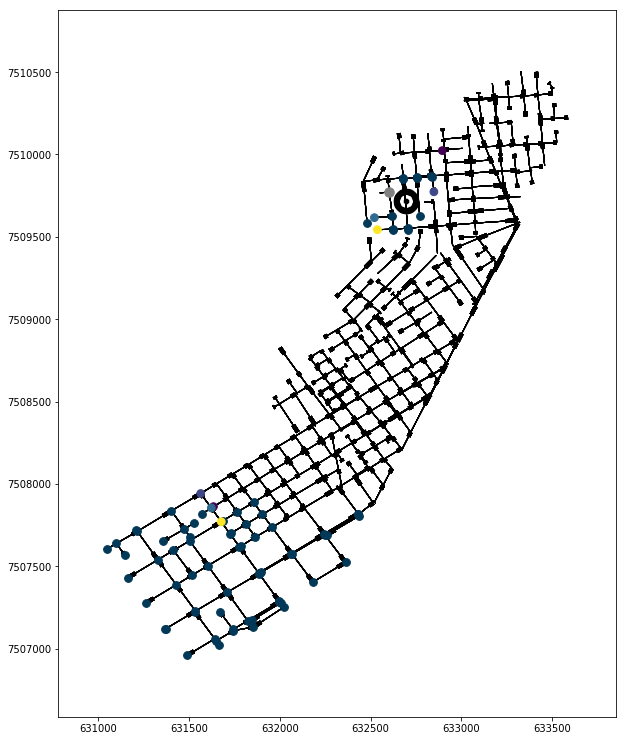

Group 1


C:\Users\lais\Documents\anac\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


[('350', 1.1659807956104253), ('349', 1.6130937801662655), ('539', 2.4854788295776187), ('536', 2.548102078191151), ('533', 2.7145053920750075), ('531', 2.8713899058037455), ('532', 2.8836118368836052), ('1', 3.0103179503463875), ('540', 3.2563227875328407), ('535', 3.4358260831601912), ('543', 3.5318188832954527), ('542', 3.5657261963031357), ('541', 3.5961685672338839), ('537', 4.9243137030511068), ('604', 11.701533871113881), ('371', 12.447175075726408), ('113', 13.216387603325089), ('584', 13.394811795938915), ('359', 14.163899196841706), ('586', 16.27345126885794), ('569', 17.387300039672056), ('566', 18.647249892085764), ('605', 21.27792661092797), ('560', 21.629252880129464), ('607', 22.512181600676918), ('606', 22.570700906530032), ('1126', 24.671487168566269), ('588', 25.985922957267547), ('587', 28.12739677523081), ('582', 28.74880962924118), ('549', 29.831624442693865), ('568', 31.105490320887569), ('583', 33.739137692639616), ('565', 34.356546250581573), ('567', 34.39750830

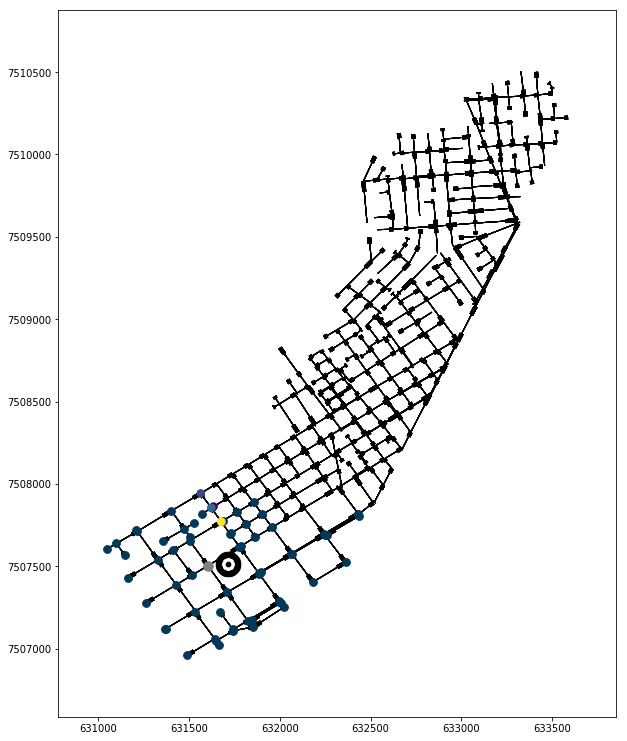

Group 2
[('1093', 41.230721670035429), ('1092', 43.411589823800725), ('544', 46.431441737919592), ('1085', 47.284812108473261), ('5', 50.085846162676916), ('1100', 67.901745353888643), ('115', 70.065595145339827), ('1099', 72.395826367608507), ('1094', 73.272759082975696), ('1083', 80.726395857303501), ('1090', 81.001709578217699), ('1098', 83.732621174968486), ('1084', 86.319867521104499), ('1097', 87.449693736049312), ('1096', 88.003283325924301), ('1091', 89.133511761561493), ('1082', 89.345066588626693), ('1095', 100.0)]


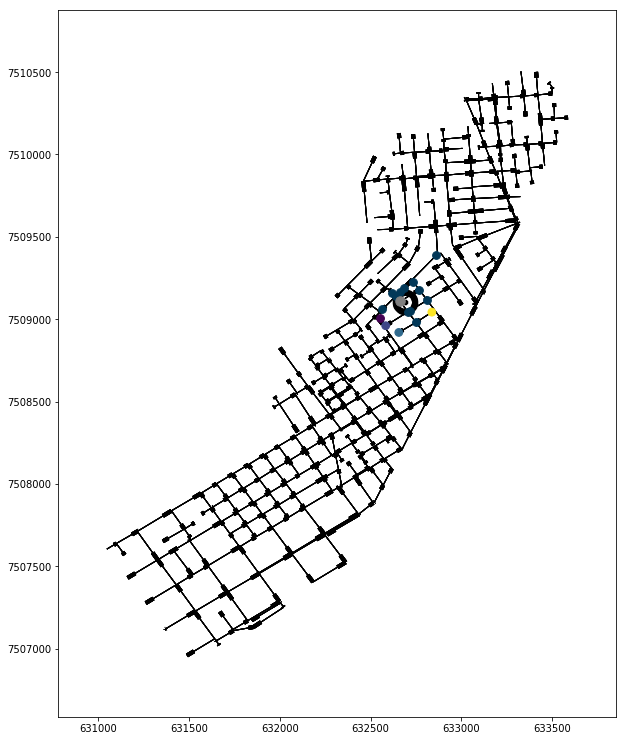

Group 3
[('855', 70.684889509128212), ('849', 73.587876255282993), ('850', 76.935810199430591), ('878', 84.913633559531149), ('1101', 85.415955611993894), ('851', 88.140327878637962), ('862', 92.356275559137472), ('860', 97.373002613756213), ('852', 98.053902696671187), ('853', 99.084830505512173), ('854', 99.302260027960358), ('859', 99.741661787804532), ('858', 99.999971021749914), ('861', 100.0)]


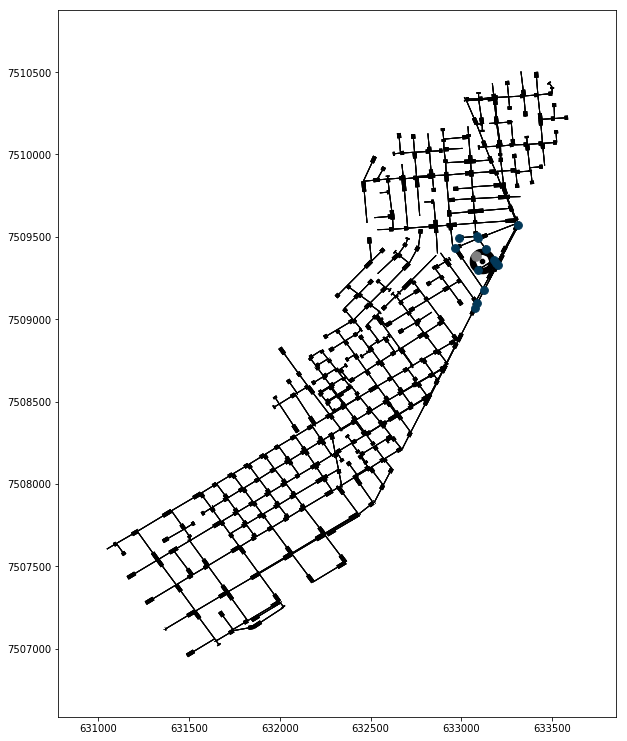

Group 4
[('1080', 20.057473236821089), ('1079', 21.638776813991697), ('1081', 24.871506928596325), ('957', 32.900904710179262), ('804', 34.624411634315173), ('803', 38.1379659986208), ('958', 40.358113774895223), ('967', 41.335791251546652), ('809', 45.453164370688164), ('810', 45.567615810072311), ('1088', 45.956618523435537), ('802', 50.038442800850525), ('805', 51.660002113285294), ('1089', 54.953547941686388), ('959', 58.129884448176703), ('963', 58.751768056910322), ('808', 59.784913840370137), ('811', 60.808076729121261), ('812', 61.140370213339587), ('807', 63.928842189892791), ('806', 64.442596923982421), ('813', 65.753392724922961), ('814', 71.146260386578135), ('964', 71.648957727863234), ('817', 72.836143043608175), ('960', 79.829528929098132), ('961', 82.577941243707031), ('823', 83.645866032622379), ('962', 83.813862376101255), ('816', 84.803922689818307), ('801', 86.908496227229278), ('825', 88.824937235152319), ('815', 93.089423140631936), ('827', 93.588760032325865), ('

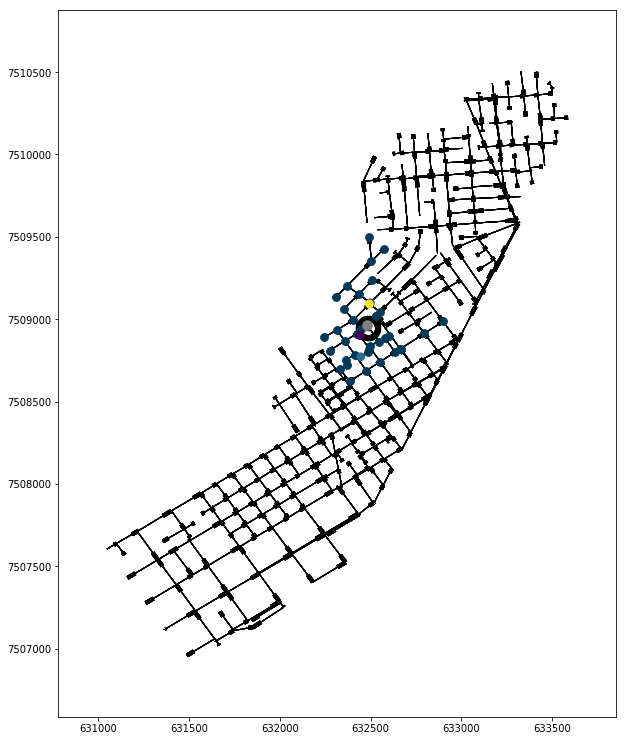

Group 5
[('775', 78.383920808568391), ('129', 78.600776467853436), ('788', 78.905206119076979), ('781', 79.202096624053013), ('779', 79.614116560403332), ('782', 83.404461134475753), ('778', 83.443122483911807), ('131', 83.66501543640436), ('130', 83.679311108056638), ('783', 89.174820420008359), ('777', 89.883279101634855), ('128', 89.942312671300684), ('786', 90.194892143065601), ('785', 91.196872848994786), ('787', 91.521566994678182), ('117', 93.087291344342887), ('116', 93.17904769431334), ('784', 93.214950917351018), ('119', 97.289533273019742), ('790', 97.445660295874674), ('118', 97.708694790657418), ('791', 98.328497357835616), ('125', 98.636863855657097), ('120', 98.808799651833013), ('127', 99.683973390830587), ('126', 99.71643337115303), ('124', 99.738454961145464), ('776', 100.0), ('789', 100.00009680429656)]


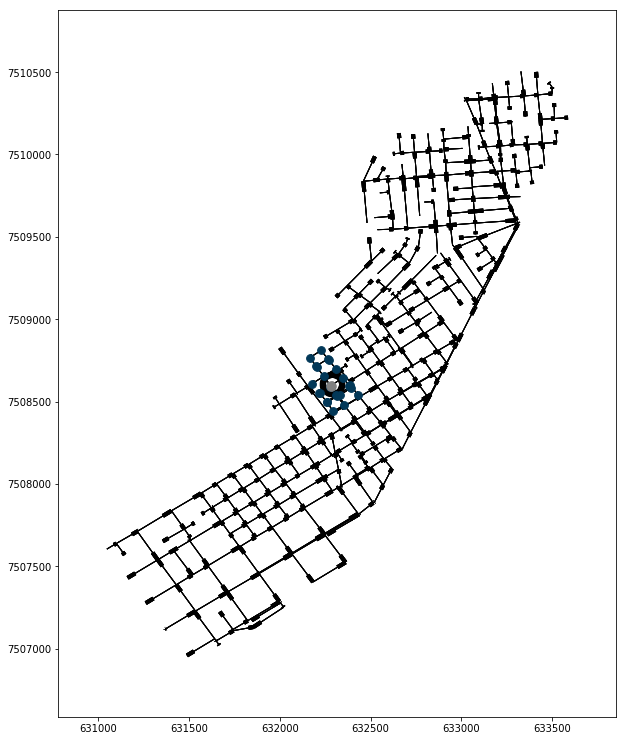

Group 6
[('123', 73.381430630128094), ('100', 74.527097498434188), ('122', 77.115858992647006), ('99', 77.384105440497848), ('98', 81.041471081545083), ('106', 86.750777270976869), ('121', 87.785744993408045), ('107', 89.388207716198451), ('97', 89.530986688629127), ('103', 89.705583130696454), ('109', 91.520726775844935), ('102', 93.381337074224319), ('108', 94.588195642452362), ('105', 98.038757524419225), ('104', 100.0)]


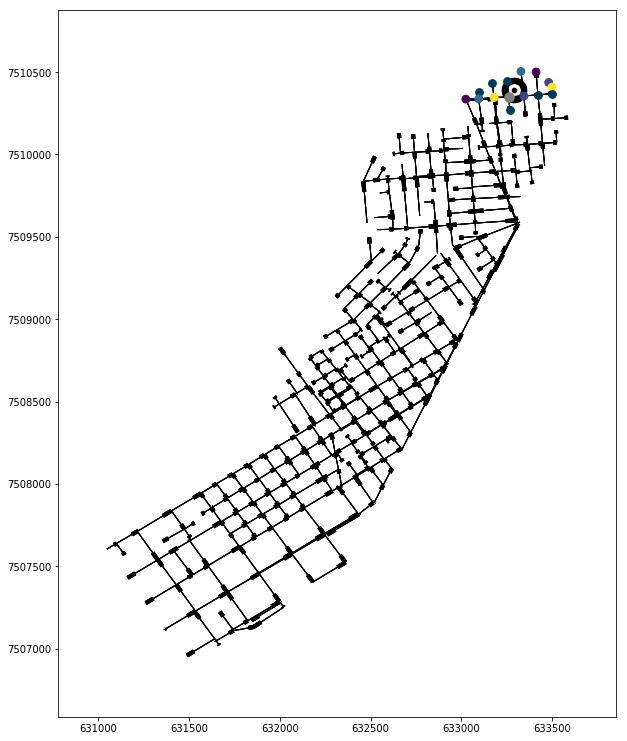

Group 7
[('194', 63.852390608991442), ('863', 74.758639655468031), ('47', 74.985901959399271), ('72', 80.666744567047786), ('61', 81.556828059850147), ('54', 85.502062478069632), ('48', 85.819227683328876), ('49', 89.47075591396019), ('53', 90.594378822844263), ('62', 91.209115893116305), ('52', 92.554279289101771), ('112', 93.816939084575651), ('111', 94.000639416514858), ('110', 95.27125302602812), ('51', 96.230186350288491), ('89', 96.54799043274781), ('199', 97.880024284643198), ('74', 98.695861922753096), ('193', 98.834746740619622), ('162', 99.501077696523978), ('55', 99.955916824302136), ('56', 100.0)]


Group 8
[('900', 31.640657001011952), ('899', 45.369585967853929), ('4', 86.891855543453985), ('898', 96.73230344407645), ('896', 97.763386284350204), ('897', 100.0), ('895', 100.00001781218195), ('894', 100.00007045969031)]


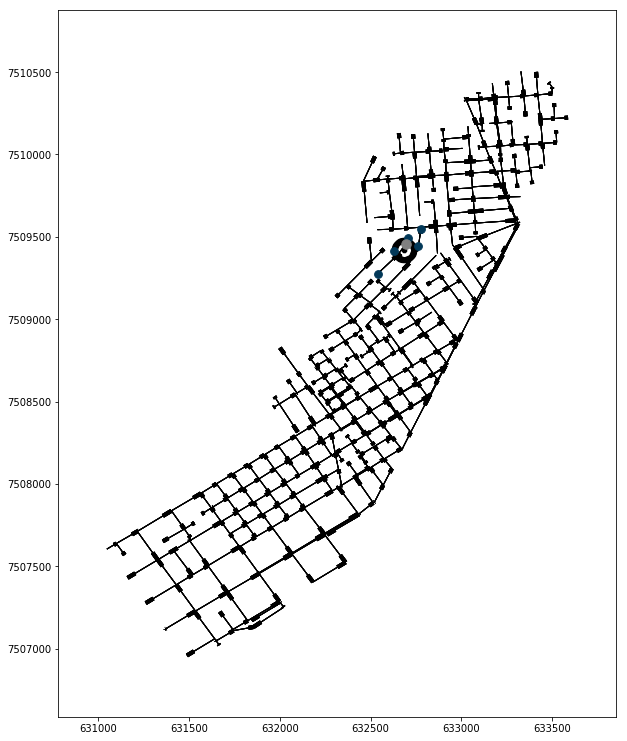

Group 9
[('647', 29.090967853409261), ('846', 41.013141027345213), ('645', 43.142682874955945), ('646', 44.95184898857817), ('792', 47.759804365256407), ('845', 52.417703922595713), ('844', 53.534253412799494), ('840', 57.402356096262771), ('841', 57.550428013272679), ('837', 58.41149888116226), ('835', 58.972762550142676), ('843', 60.759756223160586), ('761', 64.181289039281936), ('793', 65.369626688372563), ('834', 69.784458154836841), ('795', 69.964000412360164), ('766', 71.024868854029876), ('839', 71.295657734156407), ('136', 72.026542540635873), ('842', 72.660485556252681), ('771', 72.995416304983422), ('836', 74.247940188200062), ('137', 76.278530190754907), ('644', 79.085997283353493), ('769', 80.959106191928058), ('833', 83.636594455521745), ('764', 84.100961279971031), ('773', 84.20763467216311), ('838', 85.740323471870283), ('796', 86.768383217780837), ('798', 87.120260421846055), ('797', 87.362768429939663), ('829', 87.441599329111853), ('830', 87.539736853462486), ('832', 

Group 10
[('1127', 60.692233372529536), ('866', 61.96293233573067), ('864', 63.806341052565053), ('865', 65.653856857569011), ('867', 83.771211134890351), ('1086', 85.024956992340776), ('620', 90.436664445112541), ('870', 91.543315824016716), ('869', 100.0), ('868', 100.00008861853202)]


Group 11
[('63', 85.494098669930708), ('50', 85.837577066940639), ('75', 85.953028760502974), ('73', 87.332871322287076), ('69', 87.516533383496537), ('58', 90.712113662993332), ('85', 90.987952834708281), ('43', 91.196765370482595), ('82', 92.38432632149518), ('57', 92.691206626965666), ('71', 93.172982778147798), ('64', 94.473814476271798), ('66', 94.801330806124284), ('65', 95.207468082692429), ('187', 95.302879556404804), ('70', 98.441995178637043), ('67', 99.026173350671797), ('68', 100.0)]


Group 12
[('10', 67.287621219146828), ('28', 69.826217110416295), ('27', 75.560427914222473), ('29', 76.953375771345804), ('30', 77.506371866131971), ('12', 78.886641760786802), ('34', 79.319317236225544), ('11', 79.413750040185818), ('13', 86.679279204746791), ('8', 87.197608412633201), ('33', 88.409641295984869), ('32', 88.813709555158908), ('14', 92.079971162443769), ('15', 94.214344811950852), ('25', 100.0)]


Group 13
[('60', 69.069614876955839), ('59', 91.747539309546582), ('857', 97.118237224472907), ('198', 97.138521954774248), ('196', 98.12459456312618), ('2', 98.397327009116523), ('905', 98.397333188585122), ('856', 98.501318871609683), ('1111', 98.725989964403155), ('847', 99.096434177758823), ('848', 99.1614981379401), ('1112', 99.646878764895533), ('1113', 100.0)]


Group 14
[('610', 11.813025811742911), ('632', 16.509684910525159), ('628', 19.563163856092473), ('608', 19.704703718450574), ('629', 19.850067509417954), ('609', 20.098035776563165), ('627', 24.686619235932891), ('633', 25.65418912839144), ('626', 25.929799489132499), ('614', 26.392461406553196), ('631', 27.362131922691479), ('636', 28.299755871147003), ('635', 29.722686556030624), ('634', 32.128304865238668), ('765', 32.731010012417649), ('624', 33.152440121468757), ('625', 33.327861551516278), ('611', 34.070342002816389), ('760', 35.031391415795888), ('759', 36.407443352297079), ('630', 39.479478552357612), ('762', 40.477124433444367), ('641', 40.546948892035182), ('637', 41.55929809540276), ('615', 41.807209253199339), ('133', 42.617707631421602), ('114', 42.767097567744436), ('623', 43.447319604684367), ('613', 43.950562860429045), ('619', 44.494782696421382), ('763', 46.9054959291635), ('595', 47.3300606687609), ('594', 52.467467741538677), ('571', 53.276135351879617), ('573', 54

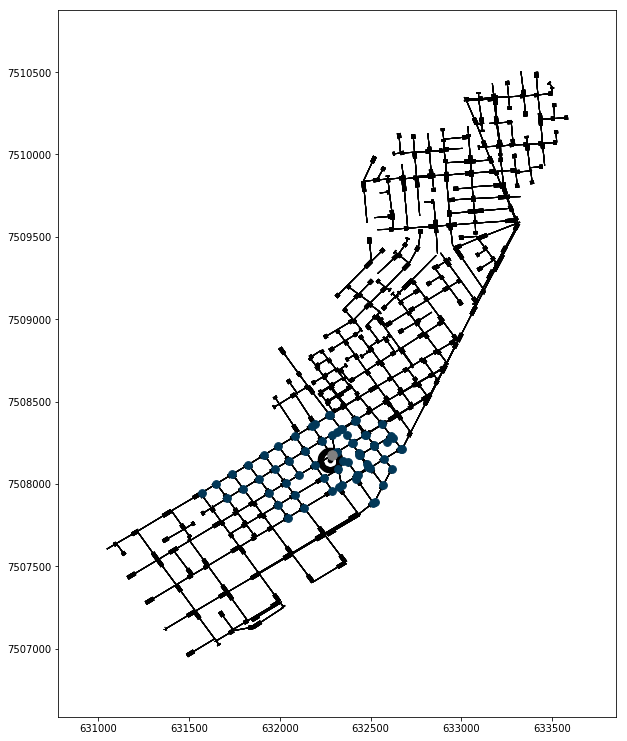

Group 15
[('45', 60.335033717466004), ('46', 63.900195399198054), ('37', 79.497268182602269), ('39', 81.111581868122585), ('42', 81.528833684003033), ('40', 89.155604407681494), ('41', 89.406543410325185), ('38', 91.194348903081973), ('21', 98.643514056670909), ('36', 100.0)]


Group 16
[('650', 74.400872342617177), ('651', 86.855922564471584), ('649', 93.781925291445873), ('648', 100.0)]


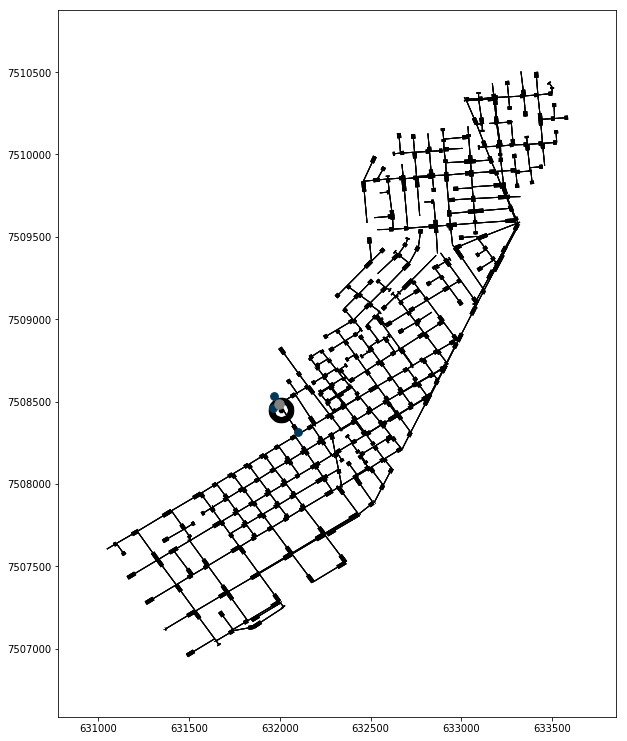

Group 17
[('1110', 80.642141430499905), ('768', 95.90829424657143), ('767', 97.125463354504092), ('794', 100.0)]


Group 18
[('893', 89.156847264176193), ('192', 94.314700925748923), ('892', 100.0)]


Group 19
[('96', 66.011741862866685), ('95', 68.022194963700557), ('101', 71.619433475811007), ('79', 72.368811057365264), ('94', 73.455152842069822), ('76', 76.732741885255393), ('84', 78.987085861935014), ('78', 79.161623745806907), ('93', 81.910850339525965), ('91', 84.867089986199161), ('90', 85.555408363021414), ('92', 86.542693159798006), ('83', 87.046188811937071), ('87', 88.623890530937004), ('88', 88.846125916781645), ('77', 89.216175800997831), ('86', 89.645406928730935), ('191', 91.112479308446709), ('186', 93.249772723018637), ('80', 99.999991238223075), ('81', 100.0)]


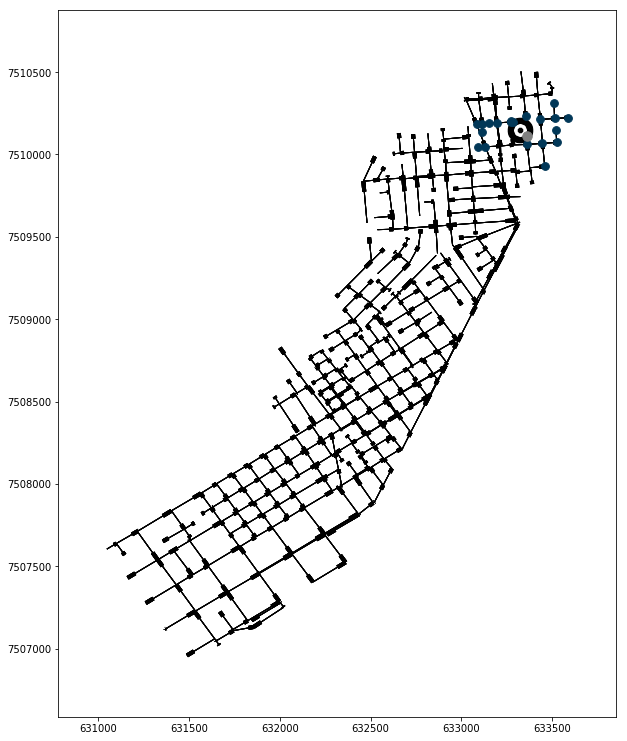

In [89]:
# esse vai

emitter = 0.05
sensor = []
p_all_groups = []

for i in range(n_groups):
    print "Group", i
    node_value = porcent_group(inp, y, i, emitter)
    print node_value

    net = inp_to_graph(inp)
    cmap = plt.cm.get_cmap('PuBu', 10)
    indice = 0
    c = 0
    faixa = 10
    node_list_faixa = []
     
    while indice < len(node_value):
        if node_value[indice][1] < np.inf:      
            if node_value[indice][1] < faixa:
                c = 1
                node_list_faixa.append(node_value[indice][0])   
            else:
                if len(node_list_faixa) > 0:         
                    draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=60, nodelist = node_list_faixa,
                        node_color = cmap(10))

                faixa = faixa + 10
                node_list_faixa = []
            if c == 1:   
                indice = indice + 1
                c = 0
        else:
            indice = indice + 1
        
    center = []
    nodes_selected = nodes_next_center(inp, y, i)
    center = center_group(inp, y, i)
    
    draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=90, nodelist = nodes_selected,  
                        node_color = 'gray') # Node next to center
    
            
    plt.scatter(center[:,0], center[:,1], marker="8", linewidths = 20, color= 'black') # Center

    fig_size = [0,0]
    fig_size[0] = 10
    fig_size[1] = 13
    plt.rcParams["figure.figsize"] = fig_size
    fig_size
    plt.show()        
   

In [79]:
    #net1 = Network(inp)
    #keys = net1.nodes.keys()
    #all_nodes = [net1.nodes[key] for key in keys] # List of all possible nodes
    #net1.ep.ENclose()
    
    #nodes_uid = [n.uid for n in all_nodes if n.node_type == "Junction"] # Remove elements that are not Junction in all_nodes
  
    #[nodes_uid.remove(node_list_faixa[i]) for i in range(len(node_list_faixa))]

    #print nodes_uid
    #net = inp_to_graph(inp)
    #draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=90, node_list = nodes_uid,
    #                    node_color = 'red') # all nodes
        
    #center = []
    #nodes_selected = nodes_next_center(inp, y, i)
    #center = center_group(inp, y, i)
    
    #draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=90, nodelist = nodes_selected,  
    #                    node_color = 'gray') # Node next to center
    # 
    

In [85]:
print np.inf 

inf
